In [30]:
import pandas as pd
import pyarrow
import numpy as np 


In [31]:
import os
print(os.getcwd())
print(os.listdir())

/Users/prasanna/Desktop/DataTalksClubs/ml-projects-work/Customer_fraud_detection/notebook
['EDA.ipynb', 'convert_csv_to_parquet.ipynb', '.ipynb_checkpoints']


In [32]:
parquet_test_identity = '../datasets/test_identity.parquet'
parquet_train_identity = '../datasets/train_identity.parquet'
parquet_test_trans = '../datasets/test_transaction.parquet'
parquet_train_trans = '../datasets/train_transaction.parquet'


In [33]:
import sys
print(sys.executable)

/Users/prasanna/Desktop/DataTalksClubs/ml-projects-work/venv/bin/python


## Load transaction and identity datasets

In [34]:
df_trans = pd.read_parquet("../datasets/train_transaction.parquet")
df_trans.shape

(590540, 394)

In [35]:
df_ident = pd.read_parquet("../datasets/train_identity.parquet")
df_ident.shape

(144233, 41)

## Fraud target distribution

In [36]:
df_trans["isFraud"].value_counts(normalize=True) * 100

isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64

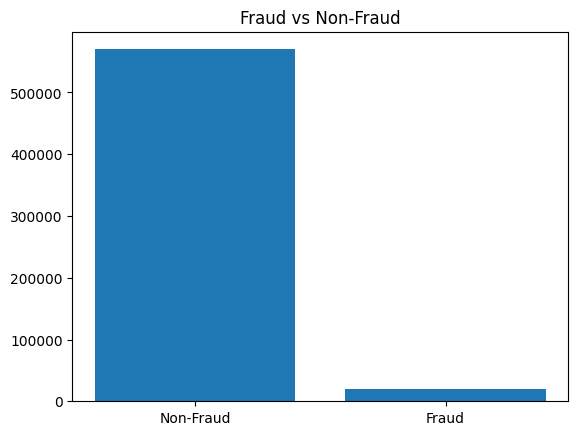

In [37]:
import matplotlib.pyplot as plt
vc = df_trans["isFraud"].value_counts()
plt.bar(vc.index, vc.values)
plt.title("Fraud vs Non-Fraud")
plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.show()


## Join identity to transaction

In [38]:
df_merge = df_trans.merge(df_ident, on="TransactionID", how="left")
print("Joined shape:", df_merge.shape)

Joined shape: (590540, 434)


In [39]:
for i in df_merge.columns: 
    print(i)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

In [40]:
df_merge[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing value

In [41]:
missing = df_merge.isna().mean() * 100
missing.sort_values(ascending=False).head(15)

id_24    99.196159
id_25    99.130965
id_07    99.127070
id_08    99.127070
id_21    99.126393
id_26    99.125715
id_27    99.124699
id_23    99.124699
id_22    99.124699
dist2    93.628374
D7       93.409930
id_18    92.360721
D13      89.509263
D14      89.469469
D12      89.041047
dtype: float64

## Card feature fraud rates

In [42]:
df_merge.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

In [43]:
card_cols = ["card1", "card2", "card3", "card4", "card5", "card6"]
for c in card_cols:
    print(f"\n{c} fraud rate top values:")
    print(df_merge.groupby(c)["isFraud"].mean().sort_values(ascending=False).head(7))


card1 fraud rate top values:
card1
18336    1.0
18318    1.0
11655    1.0
11795    1.0
12039    1.0
12095    1.0
4688     1.0
Name: isFraud, dtype: float64

card2 fraud rate top values:
card2
289.0    0.406780
405.0    0.403509
319.0    0.390000
176.0    0.360624
482.0    0.327381
407.0    0.303571
311.0    0.280277
Name: isFraud, dtype: float64

card3 fraud rate top values:
card3
132.0    1.0
125.0    1.0
139.0    1.0
181.0    1.0
175.0    1.0
224.0    1.0
206.0    1.0
Name: isFraud, dtype: float64

card4 fraud rate top values:
card4
discover            0.077282
visa                0.034756
mastercard          0.034331
american express    0.028698
Name: isFraud, dtype: float64

card5 fraud rate top values:
card5
167.0    1.000000
191.0    0.500000
107.0    0.333333
139.0    0.230769
137.0    0.147184
212.0    0.119048
147.0    0.112710
Name: isFraud, dtype: float64

card6 fraud rate top values:
card6
credit             0.066785
debit              0.024263
charge card        0.000000


## Time based patterns (TransactionDT -> Hour/Day)

In [44]:
df_merge["hour"] = (df_merge["TransactionDT"] // 3600) % 24
df_merge["day"]  = (df_merge["TransactionDT"] // 86400)

print(df_merge.groupby("hour")["isFraud"].mean().sort_values(ascending=False).head())
print(df_merge.groupby("day")["isFraud"].mean().sort_values(ascending=False).head())


hour
7    0.106102
8    0.093014
9    0.089956
6    0.077743
5    0.070302
Name: isFraud, dtype: float64
day
59     0.069942
117    0.063774
73     0.058594
65     0.057027
56     0.056651
Name: isFraud, dtype: float64


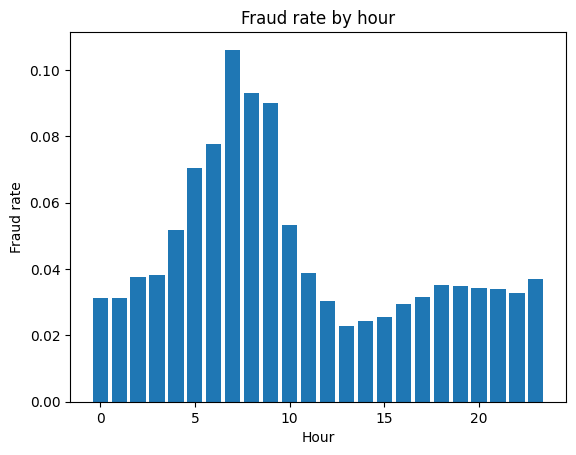

In [45]:
hf = df_merge.groupby("hour")["isFraud"].mean()
plt.bar(hf.index, hf.values)
plt.title("Fraud rate by hour")
plt.xlabel("Hour")
plt.ylabel("Fraud rate")
plt.show()


## Transaction amount analysis

In [46]:
df_merge.groupby("isFraud")["TransactionAmt"].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,569877.0,134.511665,239.395078,0.251,43.970,68.5,120.0,31937.391
1,20663.0,149.244779,232.212163,0.292,35.044,75.0,161.0,5191.000


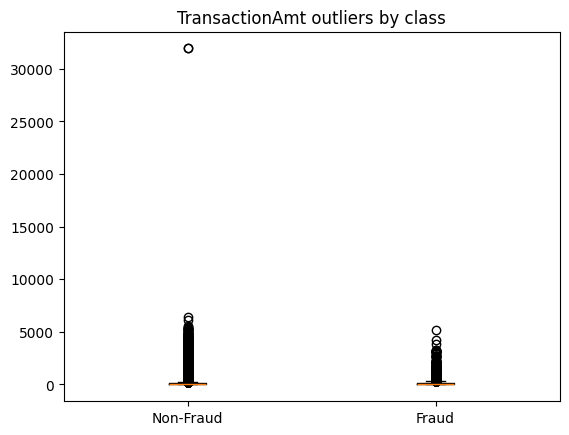

In [47]:
plt.boxplot([
    df_merge[df_merge.isFraud==0]["TransactionAmt"].dropna(),
    df_merge[df_merge.isFraud==1]["TransactionAmt"].dropna()
])
plt.xticks([1,2], ["Non-Fraud", "Fraud"])
plt.title("TransactionAmt outliers by class")
plt.show()

## Email domain fraud signals

In [48]:
email_cols = ["P_emaildomain", "R_emaildomain"]

for e in email_cols:
    print(f"\n{e} fraud rate top domains:")
    print(df_merge.groupby(e)["isFraud"].mean().sort_values(ascending=False).head(6))



P_emaildomain fraud rate top domains:
P_emaildomain
protonmail.com    0.407895
mail.com          0.189624
outlook.es        0.130137
aim.com           0.126984
outlook.com       0.094584
hotmail.es        0.065574
Name: isFraud, dtype: float64

R_emaildomain fraud rate top domains:
R_emaildomain
protonmail.com    0.951220
mail.com          0.377049
netzero.net       0.222222
outlook.com       0.165138
outlook.es        0.131640
icloud.com        0.128755
Name: isFraud, dtype: float64


## Top correlated numeric fraud features

In [49]:
corr = df_merge.corr(numeric_only=True)["isFraud"].abs()
corr.sort_values(ascending=False).head(12)

isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
V201       0.328005
V200       0.318783
V189       0.308219
V188       0.303582
V258       0.297151
V45        0.281832
V158       0.278066
Name: isFraud, dtype: float64

## Device & browser fraud trends (from identity data)

In [51]:
id_cols = ["DeviceType", "DeviceInfo", "id_31"]  # id_31 = Browser info

for i in id_cols:
    print(f"\n{i} fraud rate:")
    print(df_merge.groupby(i)["isFraud"].mean().sort_values(ascending=False).head(6))



DeviceType fraud rate:
DeviceType
mobile     0.101662
desktop    0.065215
Name: isFraud, dtype: float64

DeviceInfo fraud rate:
DeviceInfo
rv:14.0              1.0
rv:29.0              1.0
ZEIA8                1.0
iPhone               1.0
ZTE-Z956             1.0
Z965 Build/NMF26V    1.0
Name: isFraud, dtype: float64

id_31 fraud rate:
id_31
icedragon                  1.000000
Mozilla/Firefox            1.000000
comodo                     0.666667
Lanix/Ilium                0.666667
chrome 49.0 for android    0.547170
opera                      0.481928
Name: isFraud, dtype: float64


## Duplicate and corrupted row check 

In [57]:
df_merge["TransactionID"].duplicated().sum()


np.int64(0)

In [59]:
df_merge["nulls"] = df_merge.isna().sum(axis=1)
print("\n Rows with very high null fields (possible corruption)")
df_merge.sort_values("nulls", ascending=False).head(6)[["TransactionID", "nulls", "isFraud"]]



 Rows with very high null fields (possible corruption)


,TransactionID,nulls,isFraud
522237,3509237,340,0
522280,3509280,336,0
31095,3018095,332,0
474324,3461324,328,0
456111,3443111,327,0
474339,3461339,325,0


## Which segments show highest fraud rate

In [56]:
seg_cols = ["ProductCD", "card4", "card6", "addr1", "addr2"]

for col in seg_cols:
    print(f"\n  {col} → Top fraud segments")
    print(df_merge.groupby(col)["isFraud"].mean().sort_values(ascending=False).head(8) * 100)



  ProductCD → Top fraud segments
ProductCD
C    11.687269
S     5.899553
H     4.766231
R     3.782594
W     2.039939
Name: isFraud, dtype: float64

  card4 → Top fraud segments
card4
discover            7.728161
visa                3.475610
mastercard          3.433095
american express    2.869837
Name: isFraud, dtype: float64

  card6 → Top fraud segments
card6
credit             6.678480
debit              2.426251
charge card        0.000000
debit or credit    0.000000
Name: isFraud, dtype: float64

  addr1 → Top fraud segments
addr1
305.0    66.666667
483.0    56.521739
501.0    50.000000
471.0    50.000000
466.0    50.000000
391.0    45.714286
431.0    34.210526
260.0    33.333333
Name: isFraud, dtype: float64

  addr2 → Top fraud segments
addr2
10.0    100.000000
51.0    100.000000
75.0    100.000000
82.0    100.000000
46.0    100.000000
92.0    100.000000
38.0     66.666667
65.0     53.658537
Name: isFraud, dtype: float64


## Time spikes where fraud increases


 Top fraud hours:
hour
7     10.610151
8      9.301428
9      8.995563
6      7.774263
5      7.030203
10     5.321202
Name: isFraud, dtype: float64

 Top fraud days:
day
59     6.994172
117    6.377383
73     5.859375
65     5.702711
56     5.665113
115    5.648111
Name: isFraud, dtype: float64


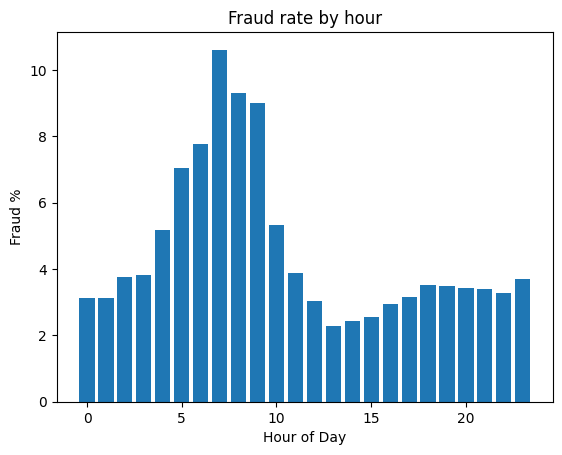

In [55]:
df_merge["hour"] = (df["TransactionDT"] // 3600) % 24
df_merge["day"]  = (df["TransactionDT"] // 86400)

print("\n Top fraud hours:")
print(df_merge.groupby("hour")["isFraud"].mean().sort_values(ascending=False).head(6) * 100)

print("\n Top fraud days:")
print(df_merge.groupby("day")["isFraud"].mean().sort_values(ascending=False).head(6) * 100)
hour_rate = df_merge.groupby("hour")["isFraud"].mean()
plt.bar(hour_rate.index, hour_rate.values * 100)
plt.title("Fraud rate by hour")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud %")
plt.show()
